## Simple Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv("1.01. Simple linear regression.csv")

In [3]:
data

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76


In [4]:
data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


In [5]:
y = data['GPA']
x1 = data['SAT']

Text(0, 0.5, 'GPA')

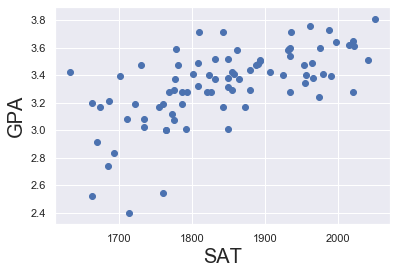

In [6]:
plt.scatter(x1, y)
plt.xlabel('SAT', fontsize=20)
plt.ylabel('GPA', fontsize=20)

In [7]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Sat, 10 Oct 2020   Prob (F-statistic):           7.20e-11
Time:                        17:02:09   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0, 0.5, 'GPA')

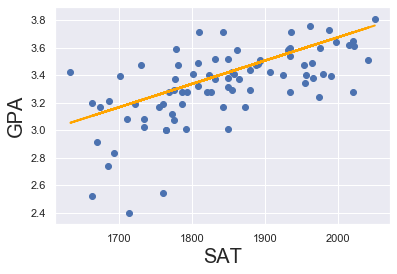

In [8]:
plt.scatter(x1, y)
yhat = 0.0017*x1 + 0.275
fig = plt.plot(x1, yhat, lw = 2, c='orange', label = 'regression line')
plt.xlabel('SAT', fontsize=20)
plt.ylabel('GPA', fontsize=20)

### With SciKitLearn

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
x = data['SAT']
y = data['GPA']
x_mat = x.values.reshape(-1,1)

In [11]:
x_mat.shape

(84, 1)

In [12]:
y.shape

(84,)

In [13]:
reg = LinearRegression()

In [14]:
reg.fit(x_mat,y)

LinearRegression()

In [16]:
#R-squared
reg.score(x_mat, y)

0.40600391479679765

In [17]:
#coefficient
reg.coef_

array([0.00165569])

In [18]:
#intercept
reg.intercept_

0.2750402996602803

In [22]:
#Making predictions
new_data = pd.DataFrame(data=[1740,1760], columns=['SAT'])
new_data

,SAT
0,1740
1,1760


In [23]:
reg.predict(new_data)

array([3.15593751, 3.18905127])

In [24]:
new_data['Predicted_GPA'] = reg.predict(new_data)
new_data

,SAT,Predicted_GPA
0,1740,3.155938
1,1760,3.189051


Text(0, 0.5, 'GPA')

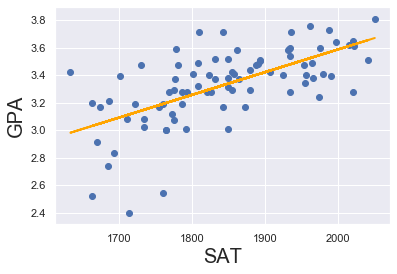

In [25]:
plt.scatter(x, y)
yhat = reg.coef_*x1 + reg.intercept_
fig = plt.plot(x1, yhat, lw = 2, c='orange', label = 'regression line')
plt.xlabel('SAT', fontsize=20)
plt.ylabel('GPA', fontsize=20)

## END!!!